<a href="https://colab.research.google.com/github/navbharti/deeplearning-2022/blob/main/MNIST_prediction_through_hidden_layer_NN_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Simple Neural Network for training MNIST Hand Written Image Prediction

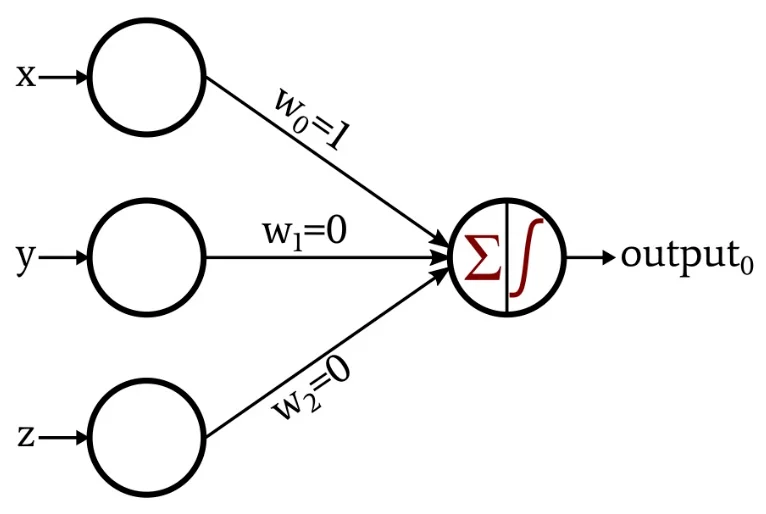

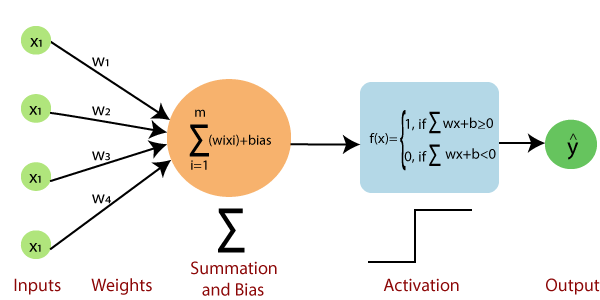

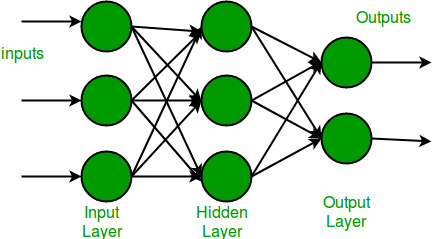

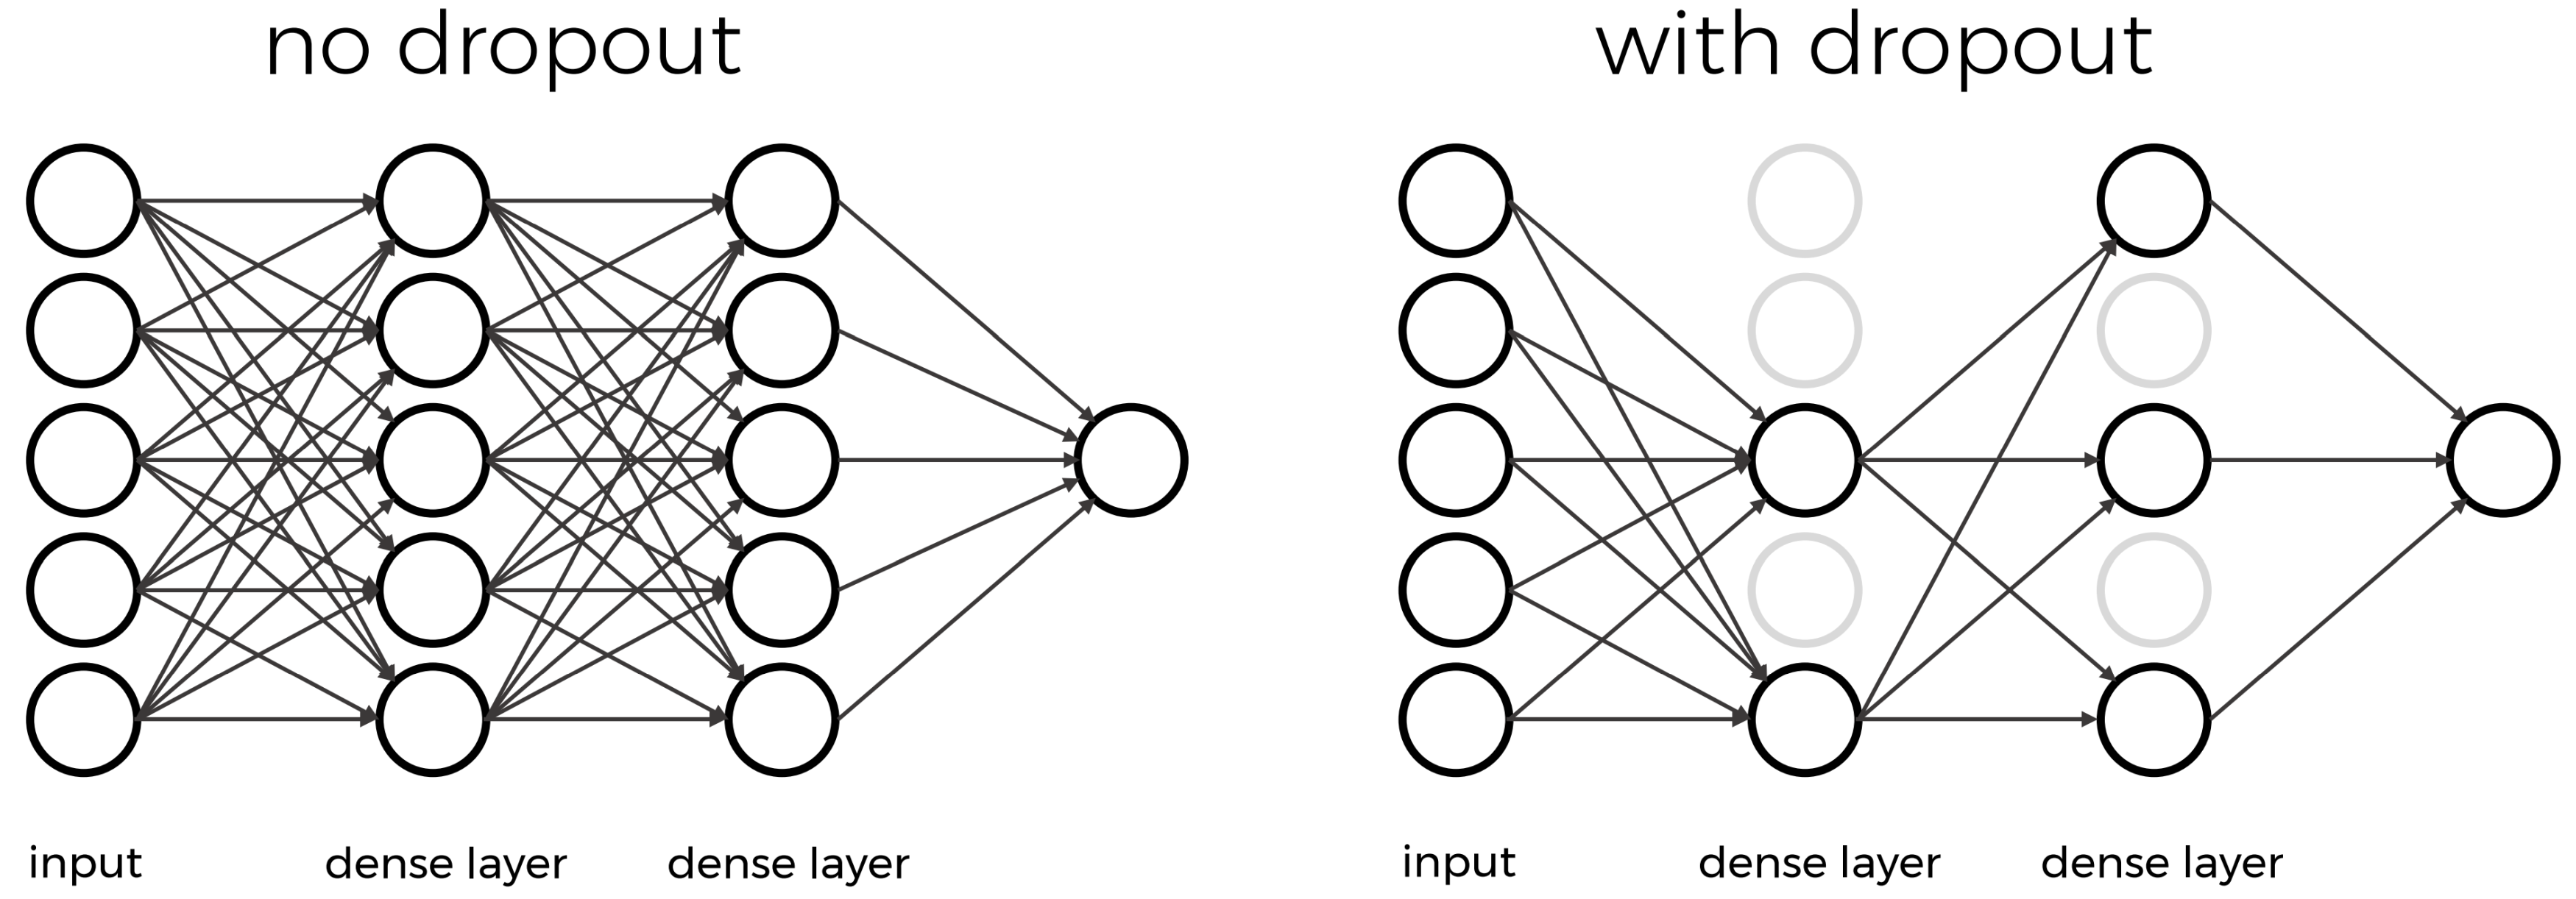

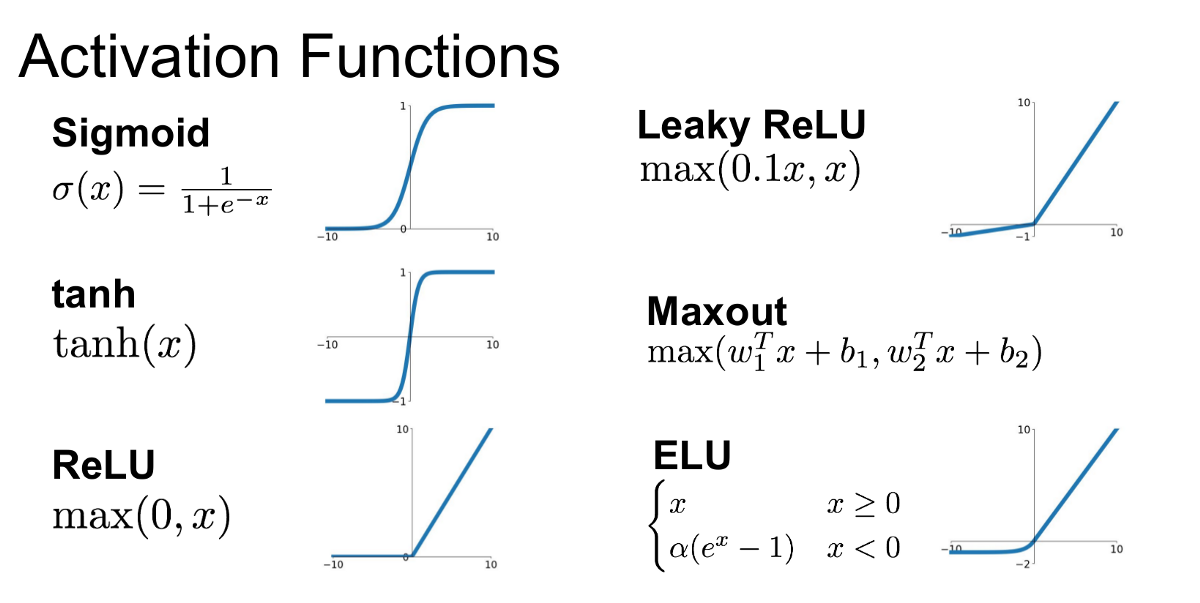

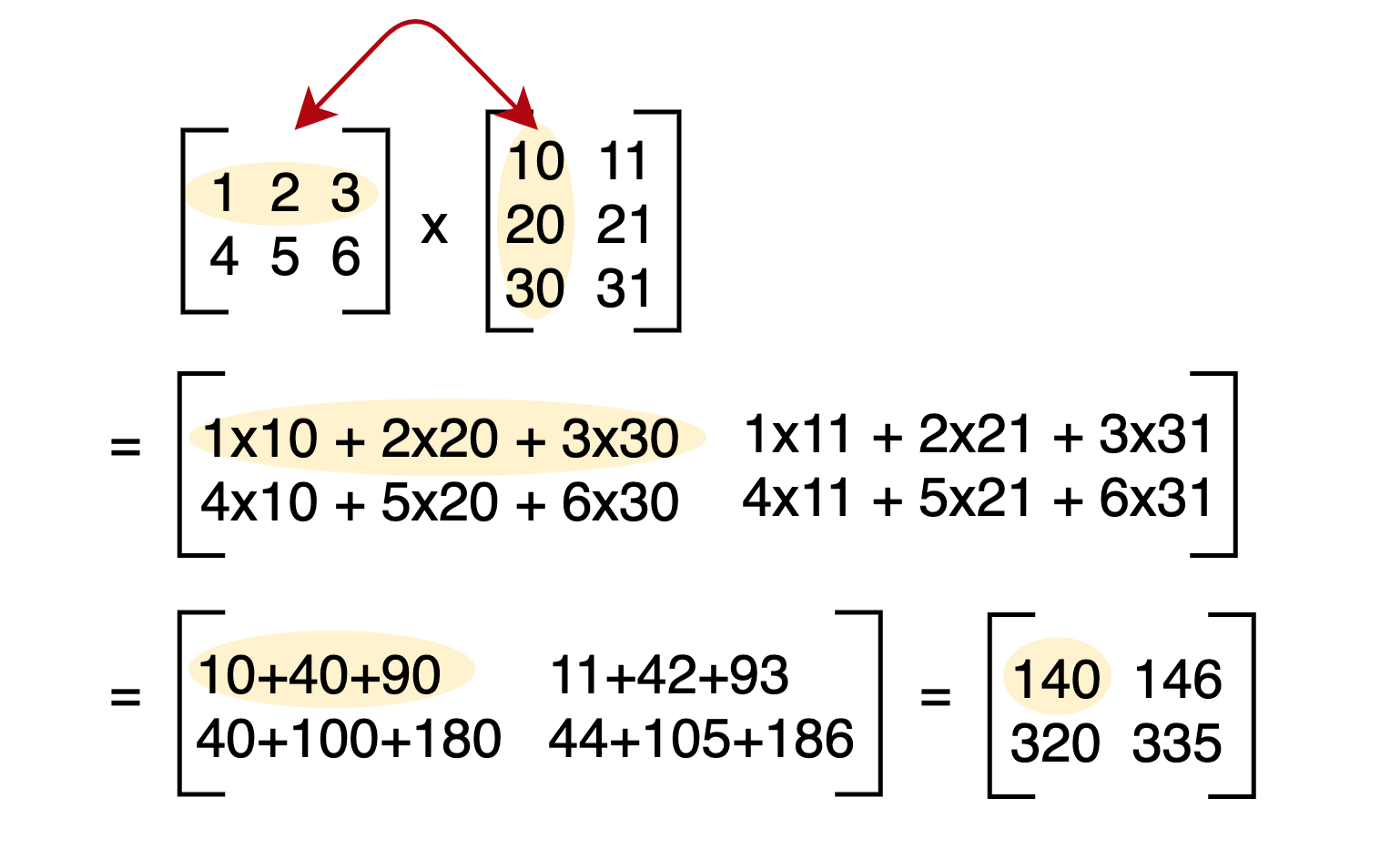

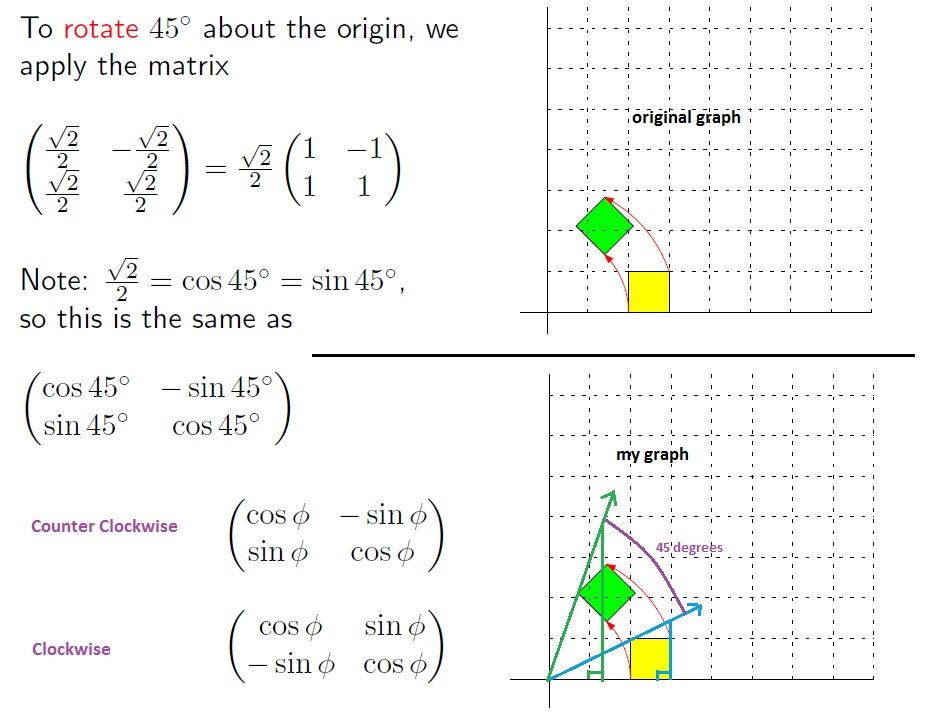

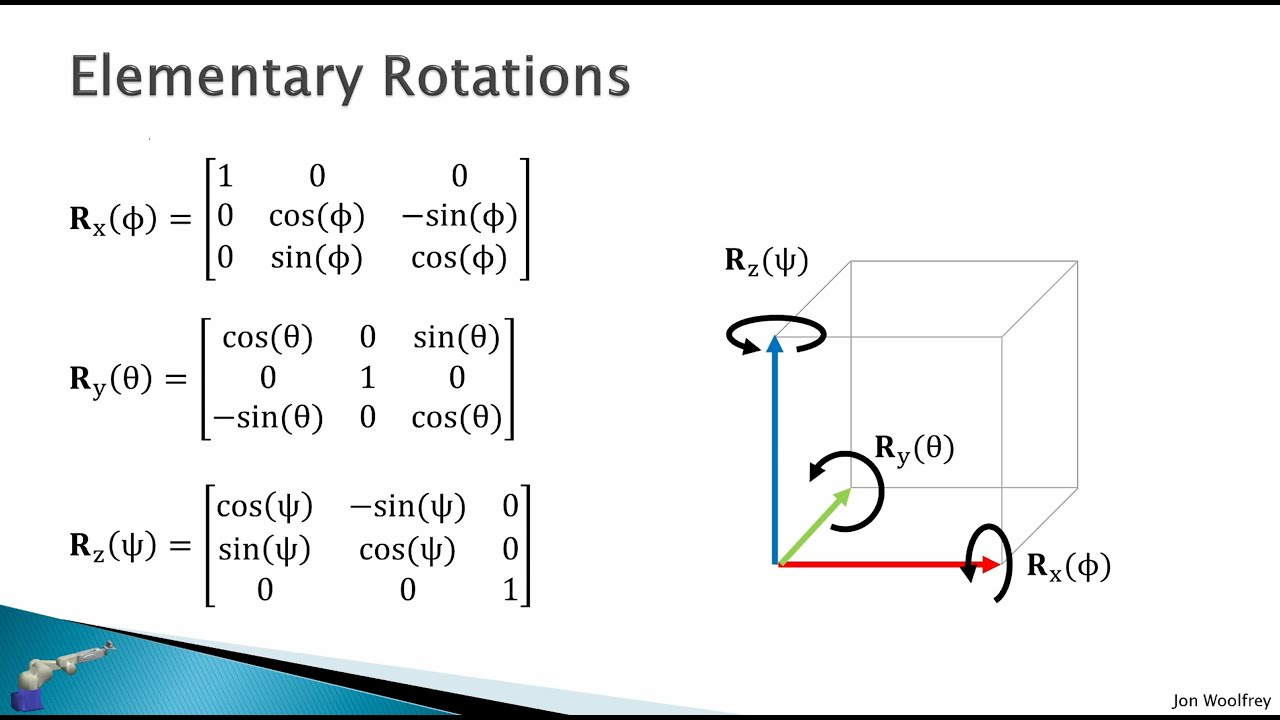

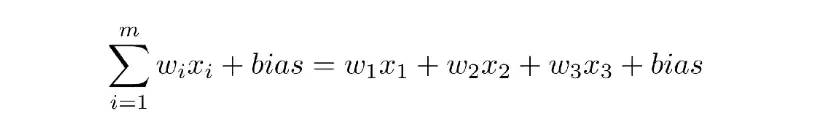

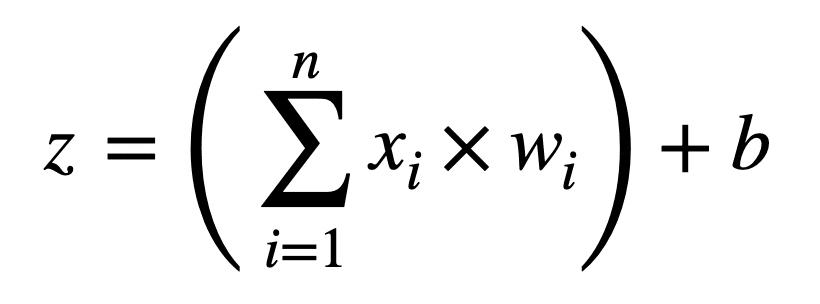

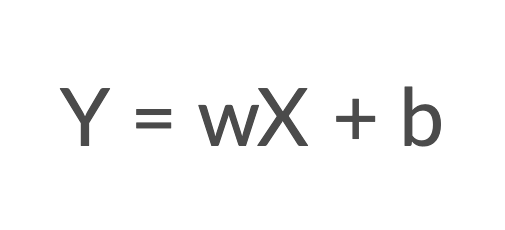

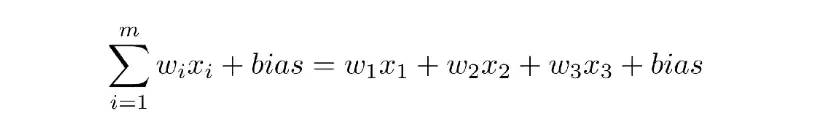

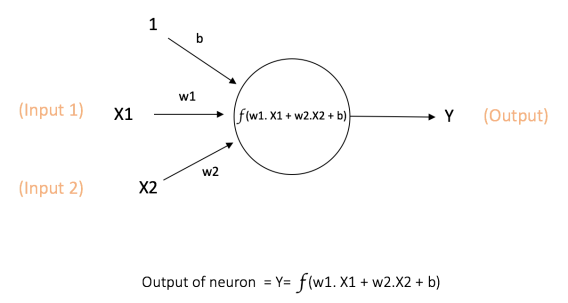

# Import the required library


In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

# Load the MNIST data from keras.dataset and split-up as training and test dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Explore the loaded dataset

In [ ]:
print(f"X_train.shape: {X_train.shape} and y_train.shape: {y_train.shape}")

X_train.shape: (60000, 28, 28) and y_train.shape: (60000,)


In [ ]:
print(f"X_test.shape: {X_test.shape} and y_test.shape: {y_test.shape}")

X_test.shape: (10000, 28, 28) and y_test.shape: (10000,)


# print an image matrix

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(f"X_train[0].shape: {X_train[0].shape}")

X_train[0].shape: (28, 28)


# plot one image

Labe : 8


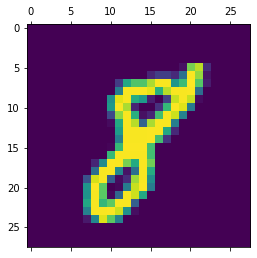

In [ ]:
plt.matshow(X_train[17])
print(f"Labe : {y_train[17]}")

# Flatten the 2D image to a Vector form

In [ ]:
X_train_flat = X_train.reshape(len(X_train), 28 * 28)
X_test_flat = X_test.reshape(len(X_test), 28 * 28)


# Check shapes after flattening the data

In [ ]:
print(f"X_train_flat.shape: {X_train_flat.shape} and y_train.shape: {y_train.shape}")
print(f"X_test_flat.shape: {X_train_flat.shape} and y_test.shape: {y_test.shape}")

X_train_flat.shape: (60000, 784) and y_train.shape: (60000,)
X_test_flat.shape: (60000, 784) and y_test.shape: (10000,)


# Print one image Vector 

In [ ]:
print("Single Train Image Vector: ", X_train_flat[0])
print("Train Image Label: ", y_train[0])

Single Train Image Vector:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 18

In [ ]:
print("Single Test Image Vector: ", X_test_flat[0])
print("Test Image Label: ", y_test[0])

Single Test Image Vector:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198

# Normalize the Vector Pixel value [0, 1]

In [ ]:
X_train_flat_scalled = X_train_flat / 255.0
X_test_flat_scalled = X_test_flat / 255.0

# Checke the Normalized data

In [ ]:
print("Single Train Image Vector: ", X_train_flat_scalled[0])
print("Single Train Image Label: ", y_train[0])

Single Train Image Vector:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

# plot the normalized image data

Single Train Image Label: 5


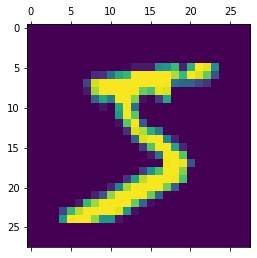

In [ ]:
plt.matshow(X_train_flat_scalled[0].reshape((28, 28)))
print(f"Single Train Image Label: {y_train[0]}")

# Create an instance of a Simple Sequential Neural Network with Dense Layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

# Compile the Model

In [ ]:
from tensorflow.python import metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# adam is Adaptive Moment Estimation: adapt the learning rate for each weight of the neural network.

# train the Model using fit() method

In [ ]:
model.fit(X_train_flat_scalled, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2758 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1248 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0416 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.01

# check the accuracy of the trained model using evaluate() method

In [ ]:
model.evaluate(X_test_flat_scalled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9765


[0.08276055008172989, 0.9764999747276306]

# Predict the new data using the trained model

In [ ]:
predict_one = model.predict(X_test_flat_scalled)
print(f"Predicted Label: {np.argmax(predict_one[0])} and Actual label: {y_test[0]}")

313/313 [==============================] - 1s 2ms/step
Predicted Label: 7 and Actual label: 7


In [ ]:
predict_one[0]

array([5.78929950e-03, 2.08982698e-08, 1.55315762e-02, 9.74396229e-01,
       2.19204556e-03, 1.27689034e-01, 5.18683478e-08, 9.99865413e-01,
       1.17322564e-01, 7.60222614e-01], dtype=float32)

In [ ]:
np.sum(predict_one[0])

3.003009

# Sigmoid function definition

In [ ]:
import numpy as np 
def sigmoid(x):
 return 1/(1 + np.exp(-x))

print(f"sigmoid(56): {sigmoid(56)}")
print(f"sigmoid(-45): {sigmoid(-45)}")

sigmoid(56): 1.0
sigmoid(-45): 2.8625185805493937e-20


# process the Predicted value for the label

In [ ]:
predict = [np.argmax(i) for i in predict_one]


# Interactive Prediction 

Enter the index of image: 6644
Predicted Label: 1 and Actual Label: 1


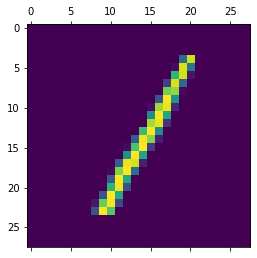

In [ ]:
img_idx = int(input("Enter the index of image: "))
plt.matshow(X_test[img_idx])
print(f"Predicted Label: {predict[img_idx]} and Actual Label: {y_test[img_idx]}")

# Plot Confusion Matrix for the trained model


Text(69.0, 0.5, 'Truth')

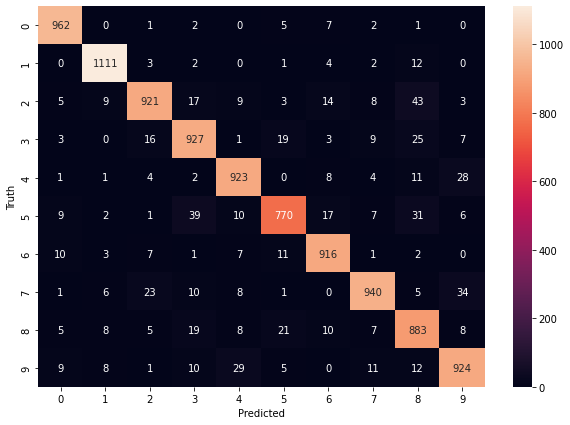

In [ ]:
import seaborn as sn

cm_mat = tf.math.confusion_matrix(labels=y_test, predictions=predict)

plt.figure(figsize=(10, 7))
sn.heatmap(cm_mat, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Save the trained model

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')

# Load the saved model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:

model=load_model('my_model.h5')

# read external image 

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(28,28))

# Convert the image to numpy array

In [ ]:
x=image.img_to_array(img)
x


# check the shape

In [ ]:
x.shape

# scale down the image pixel

In [ ]:
x=x/255

# preprocess

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

# Prediction

In [ ]:
pred = model.predict(img_data)

# get the label

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
print (f"Label: {a}")

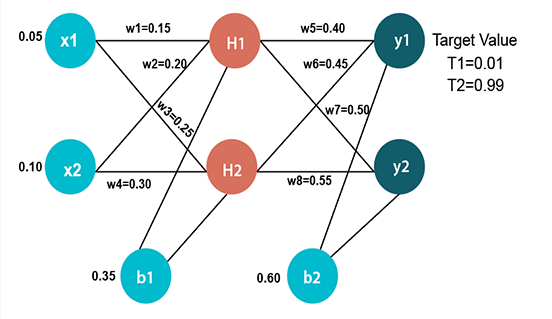

# Input Layer Neurons


$$ x1=0.05 $$
$$ x2=0.10 $$


$$X = 
\begin{bmatrix}
    x1  \\\\
    x2 
\end{bmatrix}
$$


In [1]:
import numpy as np

X = np.array([0.05, 0.10])

# Weight

$$ w1=0.15  $$ 
$$w2=0.20 $$
$$ w3=0.25  $$
$$ w4=0.30 $$
$$   w5=0.40 $$
$$ w6=0.45$$
$$ w7=0.50 $$
$$ w8=0.55 $$

$$W1 = 
\begin{bmatrix}
    w1  & w3\\\\
    w2  & w4
\end{bmatrix}
$$

$$W2 = 
\begin{bmatrix}
    w5  & w7\\\\
    w6  & w8
\end{bmatrix}
$$

# Bias

$$b1=0.35 $$   
$$ b2=0.60 $$

$$b1 = 
\begin{bmatrix}
    b1   \\\\
    b1 
\end{bmatrix}
$$

$$b2 = 
\begin{bmatrix}
    b2   \\\\
    b2 
\end{bmatrix}
$$

# Taget values

$$ y1=0.01 $$
$$ y2=0.99 $$

$$y = 
\begin{bmatrix}
    y1   \\\\
    y2 
\end{bmatrix}
$$

# find the value of h1 we first multiply the input value from the weights as

$$h1=(x1 × w1) + (x2 × w2) + b1$$
$$h1=(0.05×0.15) + (0.10×0.20) + 0.35$$
$$h1=0.3775$$

# calculate the final result of h1, we performed the sigmoid function as

\begin{align}
       \sigma(h1) =  \frac{1}{1 + e^{-h1}} 
\end{align}

\begin{align}
       \sigma(h1) =  \frac{1}{1 + e^{-0.3775}} 
\end{align}

$$\sigma(h1) = 0.593269992$$

# find the value of h2 we first multiply the input value from the weights as

$$h2=(x1×w3) + (x2×w4) + b1$$
$$h2=(0.05×0.25) + (0.10×0.30) + 0.35$$
$$h2=0.3925$$

# calculate the final result of h2, we performed the sigmoid function as

\begin{align}
       \sigma(h2) =  \frac{1}{1 + e^{-h2}} 
\end{align}

\begin{align}
       \sigma(h2) =  \frac{1}{1 + e^{-0.3925}} 
\end{align}

$$\sigma(h2) = 0.596884378$$

# calculate the values of y1 and y2 in the same way as we calculate the h1 and h2.

$$z1=(\sigma(h1)×w5) + (\sigma(h2)×w6) + b2$$
$$z1=(0.593269992×0.40) + (0.596884378×0.45) + 0.60$$
$$z1=1.10590597$$


$$z2=(\sigma(h1)* w7) + (\sigma(h2)×w8) + b2$$
$$z2=(0.593269992×0.50) + (0.596884378×0.55) + 0.60$$
$$z2=1.2249214$$



# calculate the final result of y1 and y2 we performed the sigmoid function as

\begin{align}
       \sigma(z1) =  \frac{1}{1 + e^{-z1}} 
\end{align}

\begin{align}
       \sigma(z1) =  \frac{1}{1 + e^{-1.10590597}} 
\end{align}

$$\sigma(z1) = 0.75136507$$


\begin{align}
       \sigma(z2) =  \frac{1}{1 + e^{-z2}} 
\end{align}

\begin{align}
       \sigma(z2) =  \frac{1}{1 + e^{-1.2249214}} 
\end{align}

$$\sigma(z2) = 0.772928465$$

# Our target values are $$y_1 = 0.01$$ and $$y_2=0.99$$. Our predicted values $$ŷ_1$$ and $$ŷ_2$$ value is not matched with our target values $$y_1$$ and $$y_2$$.

# find the total error, which is simply the difference between the outputs from the target outputs. The total error is calculated as

\begin{align}
        \text{mse = } &\sum_{i=1}^n \frac{1}{n}(y_i - ŷ_i)^2
\end{align}

\begin{align}
        \text{mse = } &\sum \frac{1}{2}(y_1 - ŷ_1)^2 + \frac{1}{2}(y_2 - ŷ_2)^2
\end{align}

\begin{align}
        E_{total} = \text{mse = } &\sum \frac{1}{2}(0.01 - 0.75136507)^2 + \frac{1}{2}(0.99 - 0.772928465)^2
\end{align}

\begin{align}
        E_{total} = 0.29837111
\end{align}

# backpropagate this error to update the weights using a backward pass.
# Backward pass at the output layer

# To update the weight, we calculate the error correspond to each weight with the help of a total error. 

# The error on weight w is calculated by differentiating total error with respect to w.



\begin{align}
        E_W = \frac{\partial E_{total}}{\partial W}
\end{align}

# perform backward process so first consider the last weight $$w5$$ as

\begin{align}
        \color{green}{ E_{w5} = \frac{\partial E_{total}}{\partial w5} } ...... (1)
\end{align}



\begin{align}
        \color{green}{ E_{total} = \frac{1}{2}(y_1 - ŷ_1)^2 + \frac{1}{2}(y_2 - ŷ_2)^2 }    .......(2)
\end{align}

# This is the chain Rule of derivative trace $$w_5$$ like this:

$$ w_5 ---> z_1 ---> ŷ_1 ---> E_{total}$$

# and now, each of the traced functions can be represented as:

\begin{align}
       \color{green}{ \frac{\partial E_{total}}{\partial w5} = \frac{\partial E_{total}}{\partial ŷ_1} * \frac{\partial ŷ_1}{\partial z_1} * \frac{\partial z_1}{\partial w5}} ........ (3)
\end{align}



# calculate each term one by one to differentiate $$E_{total}$$ with respect to $$w_5$$ as




# Derivative of Total Error With Respect to \begin{align}ŷ_1 \end{align}


\begin{align}
        \frac{\partial E_{total}}{\partial ŷ_1} = \frac{\partial \begin{pmatrix}\frac{1}{2}(y_1 - ŷ_1)^2 + \frac{1}{2}(y_2 - ŷ_2)^2 \end{pmatrix}}{\partial ŷ_1} 
\end{align}

\begin{align}
    \frac{\partial E_{total}}{\partial ŷ_1} =  2 * \frac{1}{2} (y_1 - ŷ_1)^{2-1} * (-1) + 0
\end{align}

\begin{align}
    \frac{\partial E_{total}}{\partial ŷ_1} =  - (y_1 - ŷ_1)
\end{align}

\begin{align}
    \frac{\partial E_{total}}{\partial ŷ_1} =  - (0.01 - 0.75136507)
\end{align}

\begin{align}
    \color{green}{\frac{\partial E_{total}}{\partial ŷ_1} =  0.74136507 }     .......(4)
\end{align}



\begin{align}
    \color{green}{ ŷ_1 = \frac{1}{1 + e^{-z_1}} } ......(5)
\end{align}

# Derivative of first predicted value with respect to z1


\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} = \frac{ \partial (\frac{1}{1 + e^{-z_1}}) }  {\partial z_1}
\end{align}

\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} = \frac { e^{-z_1}} {(1+e^{-z_1})^2}
\end{align}

\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} = e^{-z_1} * \frac { 1 } {(1+e^{-z_1})^2}
\end{align}

\begin{align}
        \color{green}{\frac{\partial ŷ_1}{\partial z_1} =  e^{-z_1} * (ŷ_1)^2} .......(6)
\end{align}

# We already have 
\begin{align}
        ŷ_1 = \frac{1}{1 + e^{-z_1}}
\end{align}

# Find $$ŷ_1$$ from the above:

\begin{align}
\color{green}{e^{-z_1} = \frac{1-ŷ_1}{ŷ_1} } .......(7)
\end{align}

# Putting the value of $$e^{-z_1}$$ in equation (6)

\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} =  e^{-z_1} * (ŷ_1)^2 .......(6)
\end{align}
\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} =  \frac{1-ŷ_1}{ŷ_1} * (ŷ_1)^2 .......(6)
\end{align}

\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} =  (1-ŷ_1) * ŷ_1  .......(6)
\end{align}

\begin{align}
        \frac{\partial ŷ_1}{\partial z_1} =  (1-0.75136507) * 0.75136507
\end{align}

\begin{align}
\color{green}{\frac{\partial ŷ_1}{\partial z_1} =  0.186815602}
         ........(8)
\end{align}



\begin{align}
\color{green}{z1=(\sigma(h1)×w5) + (\sigma(h2)×w6) + b2}
         ........(9)
\end{align}


\begin{align}
\frac{\partial (z1)}{\partial w5} = \frac{\partial ((\sigma(h1)×w5) + (\sigma(h2)×w6) + b2)}{\partial w5}
\end{align}

\begin{align}
\frac{\partial (z1)}{\partial w5} = (\sigma(h1)) + 0 + 0
\end{align}

\begin{align}
\frac{\partial (z1)}{\partial w5} = \sigma(h1)
\end{align}

\begin{align}
\color{green}{\frac{\partial (z1)}{\partial w5} = 0.596884378} ........(10)
\end{align}

# we put the values of Backpropagation Process in Deep Neural Network in equation no (3) to find the final result.

\begin{align}
        \frac{\partial E_{total}}{\partial w5} = \frac{\partial E_{total}}{\partial ŷ_a} * \frac{\partial ŷ_a}{\partial z_1} * \frac{\partial z_1}{\partial w5}
\end{align}

\begin{align}
        \frac{\partial E_{total}}{\partial w5} = 0.74136507 * 0.186815602 * 0.593269992
\end{align}

\begin{align}
    \color{green}{   E_{w5} =  \frac{\partial E_{total}}{\partial w5} = 0.0821670407 } ........(11)
\end{align}

# we will calculate the updated weight $ w5_{new} $ with the help of the following formula


\begin{align}
    w5_{new} = w5 - η *  \frac{\partial E_{total}}{\partial w5} ...... (\eta = \text{0.5 ie. learning rate})
\end{align}


\begin{align}
    w5_{new} = 0.4 - 0.5 * 0.0821670407
\end{align}


\begin{align}
    \color{green}{ w5_{new} = 0.35891648 } ...........(12)
\end{align}



# Similarly, calculate for other Weights

